# Introducción al Análisis de Datos
El análisis de datos es primordial en las tareas de reconocimiento de patrones. La manipulación de los datos para obtener información útil puede llevarse a cabo mediante métodos heurísticos (experiencia, prueba y error) o mediante la aplicación de algoritmos sofisticados.

En este documento se explorará el análisis heurístico de los datos utilizando bases de datos de dominio público y código Python.

Comenzamos por declarar nuestras librerías.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

El conjunto de datos con el cual trabajaremos (https://archive.ics.uci.edu/ml/datasets/forest+fires) se encuentra en formato CSV, es decir, Valores Separados por Comas. Como su nombre lo indica, un archivo CSV es un archivo de texto (puede crearse en un simple bloc de notas), donde los datos (características o atributos) de una muestra están separados por comas, y cada muestra se encuentra en un renglón diferente. Estos archivos son reconocibles para muchos softwares de análisis de datos como lo son Microsoft Excel, Matlab y R.

El primer paso es entonces, leer el archivo donde se encuentra el conjunto de datos. Esto se puede realizar de diferentes maneras, con diferentes librerías, pero nosotros usaremos pandas:

In [2]:
# Leer el archivo CSV
dataset = pd.read_csv('forestfires.csv')

# Imprime la primera muestra
dataset.iloc[0]

X           7
Y           5
month     mar
day       fri
FFMC     86.2
DMC      26.2
DC       94.3
ISI       5.1
temp      8.2
RH         51
wind      6.7
rain        0
area        0
Name: 0, dtype: object

El conjunto de datos que leímos representa los datos recopilados del bosque situado en el Parque Montesinho en Portugal. En él se analizan los incendios forestales ocurridos entre los años de 1980 y 2005. 
Podemos observar que el conjunto de datos contiene trece atributos o características:

1. X     - Coordenada espacial X dentro del Parque Montesinho. Rango [1, 9]
2. Y     - Coordenada espacial Y dentro del Parque Montesinho. Rango [2, 9]
3. month - Mes del año en inglés. "jan", "feb", "mar", ... , "dec"
4. day   - Día de la semana en inglés. "mon", "tue", "wed", ... "sun"
5. FFMC  - Índice FFMC del sistema FWI*. Rango [18.7, 96.2]
6. DMC   - Índice DMC del sistema FWI. Rango [1.1, 291.3]
7. DC    - Índice DC del sistema FWI. Rango [7.9, 860.6]
8. ISI   - Índice ISI del sistema FWI. Rango [0.0, 56.10]
9. temp  - Temperatura en grados Celsius. Rango [2.2, 33.30]
10. RH   - Humedad relativa en %. Rango [15.0, 100]
11. wind - Velocidad del viento en km/h. Rango [0.40, 9.40]
12. rain - Lluvia en mm/m2. Rango [0.0, 6.4]
13. area - El área quemada en el bosque en hectáreas. Rango [0.0, 1090.84]

*FWI - Canadian Wildland Fire Information System (http://cwfis.cfs.nrcan.gc.ca/background/summary/fwi)

In [3]:
# Imprime el número de muestras y el número de atributos del conjunto de datos
dataset.shape

(517, 13)

### ¿Qué hay en mi conjunto de datos?

In [4]:
# Imprime las primeras diez muestras
dataset.iloc[range(10)]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


El análisis de datos comienza con la formulación de preguntas, en muchas ocasiones es posible contestarlas a partir de datos adquiridos mediante sensores, encuestas, registros, imágenes, etc. Sin embargo, las respuestas no se encuentran a simple vista, por esto, es necesaria la manipulación de los datos, pues de esta manera podremos obtener la información que nos interesa.

### ¿En qué mes del año son más frecuentes los incendios forestales? 

Esta pregunta resulta bastante obvia. Un poco de código puede ayudar a contestarla.

In [5]:
# Genera un diccionario de meses del año
monthName = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

# Cuenta cuántos incendios ocurrieron en cada mes
firesPerMonth = []
for month in monthName:
    nFires = dataset[ dataset["month"] == month ].shape[0]
    firesPerMonth.append(nFires)

# Imprime tus resultados
firesPerMonth

[2, 20, 54, 9, 2, 17, 32, 184, 172, 15, 1, 9]

El código anterior nos muestra el número de incendios ocurridos en cada mes del año. Sin embargo, las personas tenemos más facilidad para entender la información de manera gráfica, que observando un conjunto de números.

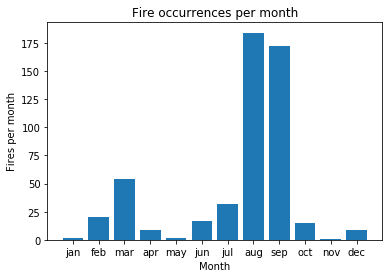

In [11]:
plt.bar(monthName, firesPerMonth)  # Gráfico de barras
plt.xlabel('Month')                # Etiqueta del eje X
plt.ylabel('Fires per month')      # Etiqueta del eje Y
plt.title('Fire occurrences per month') # Título del gráfico
plt.show()                         # Muestra la gráfica

La gráfica revela que la mayoría de los incendios forestales se presentan en los meses de agosto y septiembre, los cuales corresponden con el verano en Portugal.

Podríamos pensar que esta gráfica nos revela toda la verdad acerca de los incendios en el Parque Montesinho, pero el resto de los atributos pueden revelarnos una información más detallada. Analicemos los incendios que devastaron un área mayor, y en qué mes ocurrieron.

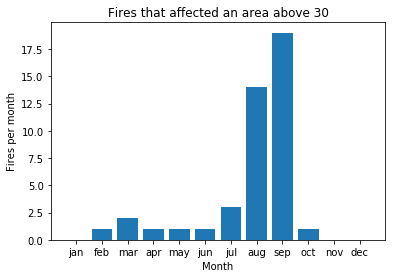

In [10]:
areaThreshold = 30

# Encuentra los incendios que afectaron un área mayor a "areaThreshold"
firesPerArea = dataset[ dataset['area'] >= areaThreshold ]

# Encuentra en qué meses se presentaron dichos incendios
firesPerMonthAndArea = []
for month in monthName:
    nFires = firesPerArea[ firesPerArea["month"] == month ].shape[0]
    firesPerMonthAndArea.append(nFires)
    
# Grafica los resultados
plt.bar(monthName, firesPerMonthAndArea)  # Gráfico de barras
plt.xlabel('Month')                # Etiqueta del eje X
plt.ylabel('Fires per month')      # Etiqueta del eje Y
plt.title('Fires that affected an area above ' + str(areaThreshold) ) # Título del gráfico
plt.show()                         # Muestra la gráfica

El gráfico anterior confirma el hecho de que la mayoría de los incendios ocurrieron en los meses de agosto y septiembre, además, nos indica que dichos incendios han sido los más devastadores, pues han consumido mayores áreas.

Los procesos que hemos realizado sobre los datos son parte de lo que llamamos "Análisis Exploratorio de Datos". Este nos permite encontrar datos fuera de lo común (outliers), necesidad de transformar los datos, así como ideas acerca de qué modelo puede servir para descubrir la información que nos interesa.

### Actividad 1
Utilizando la misma base de incendios forestales, códigos Python y tu buena intuición, encuentra la relación entre la cantidad de incendios forestales, las regiones afectadas más frecuentemente y la actividad humana.

Genera un reporte sencillo, con un máximo de dos cuartillas donde muestres los resultados obtenidos y las conclusiones a que llegaste. Utiliza gráficos, mapas, tablas o cualquier herramienta que ayude a visualizar la información con facilidad. Recuerda que toda herramienta visual debe estar acompañada de un texto de apoyo que ayude al lector a entender tus resultados y el cómo formulaste tus conclusiones.

PISTAS:
- Para conocer la verdadera ubicación de las regiones afectadas, busca y descarga un mapa del Parque Montesinho. 
- Considera que la actividad humana en la zona se incrementa en las temporadas vacacionales.


# Dataset
https://archive.ics.uci.edu/ml/datasets/forest+fires